In [777]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn import linear_model, model_selection, metrics, svm
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [690]:
filteredDF = pd.read_csv("filteredDF.csv", decimal=".", delimiter=",")
#shape 6805 lignes et 38 colonnes
filteredDF.columns

Index(['Unnamed: 0', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'totalKbtu', 'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'City', 'State', 'Location',
       'PrimaryPropertyType', 'PropertyGFAParking', 'Neighborhood',
       'NeighborhoodInt', 'BuildingType', 'PrimaryPropertyTypeInt',
       'BuildingTypeInt', 'ENERGYSTARScoreColor', 'TotalGHGEmissions'],
      dtype='object')

In [691]:
np.unique(filteredDF["GHGEmissionsIntensity(kgCO2e/ft2)"])

array([0.  , 0.01, 0.02, ...,  nan,  nan,  nan])

In [692]:
#filteredDF["PropertyGFAParking"]  = filteredDF["PropertyGFAParking"].astype(str)
filteredDF["PrimaryPropertyType"]  = filteredDF["PrimaryPropertyType"].astype(str)
#filteredDF["ListOfAllPropertyUseTypes"] = filteredDF["ListOfAllPropertyUseTypes"].astype(str)
#filteredDF["PropertyGFAParking"] = filteredDF["PropertyGFAParking"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "autre")
filteredDF.shape

(6716, 31)

<AxesSubplot:>

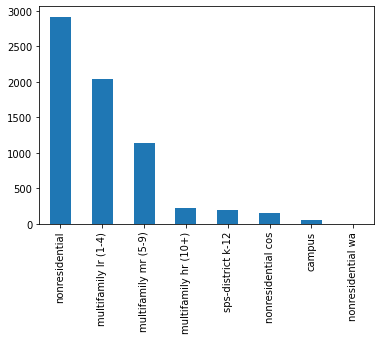

In [693]:
filteredDF["PrimaryPropertyType"]  = filteredDF["PrimaryPropertyType"].astype(str)
filteredDF["BuildingType"].value_counts().plot(kind='bar')

In [694]:
a = filteredDF["PrimaryPropertyType"].value_counts().to_frame()
a = a[a["PrimaryPropertyType"] > 1]
print(sum(a.values))
a
# faible nombre d'instances eventuellement à oublier. 

[6716]


,PrimaryPropertyType
low-rise multifamily,1985
mid-rise multifamily,1103
small- and mid-sized office,590
other,514
large office,344
k-12 school,275
mixed use property,259
high-rise multifamily,208
retail store,191
non-refrigerated warehouse,187


Traitement de PrimaryPropertyType and Neighborhood

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a 

<AxesSubplot:>

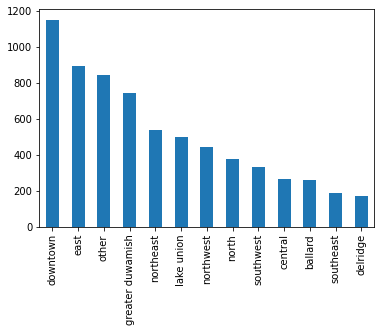

In [695]:
filteredDF2 = filteredDF
for column in filteredDF.columns:
    #print(column, str(filteredDF[column].dtype))
    if str(filteredDF[column].dtype) == "object" and column in ["PrimaryPropertyType", "City", "State", "Neighborhood"]: #"Location", "Neighborhood", "PropertyGFAParking", 
        a = filteredDF[column].value_counts().to_frame()
        a = a[a[column] > 1]
        #print(column, list(a.index.values))
        
        #filteredDF2 = filteredDF2[filteredDF2[column].isin(list(a.index.values))]
        filteredDF2[column].loc[filteredDF2[column].str.len() > 20] = "other"
        #filteredDF2[column].loc[filteredDF2[column].str.isnumeric()] = "other"
        
        filteredDF2[column] = filteredDF2[column].str.strip()
        filteredDF2[column] = filteredDF2[column].str.lower()
        filteredDF2[column] = filteredDF2[column].str.replace('"', '')
filteredDF2['Neighborhood'].value_counts().plot(kind="bar")
#filteredDF2['Location'].value_counts().plot(kind="bar")
#filteredDF2['PropertyGFAParking'].value_counts().plot(kind="bar")
#filteredDF2['Neighborhood'].loc[filteredDF2['Neighborhood'].str.len() > 20] = "other"
#filteredDF2['Neighborhood'].loc[filteredDF2['Neighborhood'].str.isnumeric()] = "other"
#filteredDF2['Neighborhood'].value_counts()

Traitement de Location

In [570]:
#filteredDF2['Location'].value_counts()
#filteredDF2['Location'].loc[filteredDF2['Location'].str.len() > 20] = "other"
#filteredDF2['Location'].value_counts()
filteredDF2.shape

(6716, 28)

In [423]:
#Traitement de PropertyGFAParking
#filteredDF2['PropertyGFAParking'].value_counts().to_frame()
#filteredDF2['PropertyGFAParking'].loc[filteredDF2['PropertyGFAParking'].str.isnumeric()] = "other"
#filteredDF2['PropertyGFAParking'].loc[filteredDF2['PropertyGFAParking'].str.len() > 30] = "other"
#filteredDF2['PropertyGFAParking'] = filteredDF2['PropertyGFAParking'].replace("nan", "other")
#filteredDF2['PropertyGFAParking'].value_counts().to_frame()

In [305]:
nonNullRateFrame = pd.read_csv("nonNullFrame.csv", decimal=".", delimiter=",")
nonNullRateFrame

,Unnamed: 0,columns,type,filledRatio,nbValues
0,0,OSEBuildingID,float64,98.692,3432
1,1,DataYear,float64,98.692,2
2,2,BuildingType,object,100.000,96
3,3,PrimaryPropertyType,object,100.000,120
4,4,PropertyName,object,98.692,6537
...,...,...,...,...,...
83,83,File Paths,object,100.000,2
84,84,NeighborhoodInt,int64,100.000,3226
85,85,PrimaryPropertyTypeInt,int64,100.000,120
86,86,BuildingTypeInt,int64,100.000,96


Traitement de YearBuilt et BuildingTypeInt et transformation de ces variables en numerics

In [631]:
#filteredDF2["YearBuilt"] = pd.to_numeric(filteredDF2["YearBuilt"], errors='coerce')
#filteredDF2["BuildingTypeInt"] = pd.to_numeric(filteredDF2["BuildingTypeInt"], errors='coerce')
np.unique(filteredDF2["BuildingTypeInt"].values)
filteredDF2["YearBuilt"].value_counts()

2000    144
2008    135
1989    134
1999    129
1988    128
       ... 
1942      6
1944      4
1939      4
1936      2
1935      2
Name: YearBuilt, Length: 113, dtype: int64

In [565]:
# number of floors 
#filteredDF2['NumberofFloors'] = filteredDF2['NumberofFloors'].replace(np.nan, 0)
#filteredDF2 = filteredDF2[filteredDF2['GHGEmissions(MetricTonsCO2e)'] > -1000]
#filteredDF2['NumberofFloors'].value_counts()

In [696]:
#traitement de years built
filteredDF2['PrimaryPropertyTypeEnc'].value_counts().to_frame()

KeyError: 'PrimaryPropertyTypeEnc'

In [701]:
# Energy Variables
#for y let's keep only rows with data
#filteredDF2['GHGEmissions(MetricTonsCO2e)'] = filteredDF2['GHGEmissions(MetricTonsCO2e)'].replace(np.nan, -1000)
#filteredDF2 = filteredDF2[filteredDF2['GHGEmissions(MetricTonsCO2e)'] > 0]

filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'] = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'] > -1000]
filteredDF2['LargestPropertyUseTypeGFA'] = filteredDF2['LargestPropertyUseTypeGFA'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['LargestPropertyUseTypeGFA'] > -1000]
filteredDF2['PropertyGFATotal'] = filteredDF2['PropertyGFATotal'].replace(np.nan, -1000)
filteredDF2 = filteredDF2[filteredDF2['PropertyGFATotal'] > -1000]
#filteredDF2['YearBuilt'] = filteredDF2['YearBuilt'].replace(np.nan, -1000)
#print(np.unique(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values))
#nonNullRateFrame.columns.str.contains("kbtu")
kbtusColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kBtu")]
CO2Columns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("CO2")]
kwhColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kWh")]
listToChange = list(kwhColumns['columns'].values) + list(CO2Columns['columns'].values) + list(kbtusColumns['columns'].values)
noEnergyList = []

toTrash = ['Unnamed: 0', 
           #"ListOfAllPropertyUseTypes", 
           "Location", 
           "State", 
           "ThirdLargestPropertyUseType", 
           "PropertyGFAParking", 
           "Neighborhood", 
           "PrimaryPropertyType", 
           "NaturalGas(therms)", 
           "YearsENERGYSTARCertified", 
           "ENERGYSTARScore", 
           "ENERGYSTARScoreColor", 
           "TotalGHGEmissions", 
           "City", 
           #"YearBuilt", 
           "Address", 
           "GHGEmissionsIntensity"]
toTrash = toTrash + [
        'NumberofBuildings', 
       'PropertyGFABuilding(s)', 
        'LargestPropertyUseType', 
        "LargestPropertyUseTypeGFA",
        #"PropertyGFATotal", 
        "BuildingType", 
        "totalKbtu", 
       "NumberofFloors", 
       'ThirdLargestPropertyUseTypeGFA']


for column in filteredDF2.columns:
    if column not in listToChange and column not in toTrash:
        noEnergyList.append(column)

print("noEnergyList", noEnergyList)
#print("frameShape", filteredDF2.shape)

noEnergyList ['YearBuilt', 'PropertyGFATotal', 'NeighborhoodInt', 'PrimaryPropertyTypeInt', 'BuildingTypeInt']


# Linear Regression CO2 Metrics 

In [704]:
#Linear Regression CO2 Metrics 
y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1)
#LabelEncoder make a multiclass value
#y_labeled = LabelEncoder().fit_transform(filteredDF["TotalGHGEmissions"].values)

stdScaler = StandardScaler()
X = filteredDF2.filter(items=noEnergyList)

#X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values, y, train_size=0.8)

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.23793383110784927


# avec une standardisation des données

In [706]:
y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1))
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
#y = filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1)
#LabelEncoder make a multiclass value
#y_labeled = LabelEncoder().fit_transform(filteredDF["TotalGHGEmissions"].values)

stdScaler = StandardScaler()
X = filteredDF2.filter(items=noEnergyList)

X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y_std, train_size=0.7)
y_std

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.03378559794184288


In [649]:
#filteredDF = filteredDF[filteredDF["GHGEmissionsIntensity"] > 0]
filteredDF["GHGEmissions(MetricTonsCO2e)"].values

array([ 2.49430e+02,  2.63510e+02,  2.06148e+03, ..., -1.00000e+00,
       -1.00000e+00, -1.00000e+00])

# With label encoder for "Neighborhood PrimaryPropertyType BuildingType"

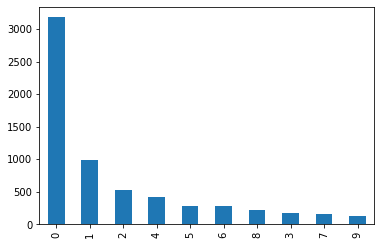

In [724]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder()
for column in ["Neighborhood", "PrimaryPropertyType", "BuildingType", "LargestPropertyUseType","Location", "PropertyGFAParking", "NumberofFloors", "NumberofBuildings"]:
    newCol = column+"Enc"
    filteredDF2[newCol] = encoder.fit_transform(filteredDF2[column].values)
    filteredDF2[newCol].value_counts().plot(kind="bar")
#filteredDF2["BuildingTypeEnc"].value_counts().plot(kind="bar")


# Label Encoder + Std 

In [737]:
#Label Encoder + Std 
columnsEncodedToKeep = ['YearBuilt', 'PropertyGFATotal',  "LocationEnc", "LargestPropertyUseTypeEnc", "PropertyGFAParkingEnc", "NumberofFloorsEnc", "NumberofBuildingsEnc", 'NeighborhoodEnc', 'PrimaryPropertyTypeEnc', 'BuildingTypeEnc']
#y = filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1)
#y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissionsIntensity(kgCO2e/ft2)'].values.reshape(-1, 1))
y_std = StandardScaler().fit_transform(filteredDF2['GHGEmissions(MetricTonsCO2e)'].values.reshape(-1, 1))

#GHGEmissionsIntensity(kgCO2e/ft2)
stdScaler = StandardScaler()
X = filteredDF2.filter(items=columnsEncodedToKeep)

X_std = stdScaler.fit_transform(X.values)
#print(np.unique(X_std))
#print(np.unique(y_std))
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_std, y_std, train_size=0.7)

regression = linear_model.LinearRegression()
#regression = linear_model.LogisticRegression(max_iter=100000)
regression.fit(X_train, y_train)

print("score", regression.score(X_test, y_test))

score 0.2723271266942997


# Avec Grid Search 


In [762]:
lrCV = linear_model.LinearRegression()
params = {"fit_intercept": ["True", "False"], "normalize": ["True", "False"] } 
for cv in range(2, 20):
    lr_gs = GridSearchCV(lrCV, params, cv=cv)
    #print(lrCV.get_params().keys())
    lr_gs.fit(X_train, y_train)
    print(cv, lr_gs.best_params_)
    print(cv, lr_gs.best_score_)
    Y_pred = lr_gs.predict(X_test)
    rmseLinearRegression = np.sqrt(metrics.mean_squared_error(y_test, Y_pred))
    print(cv, lr_gs.best_score_, rmseLinearRegression)

2 {'fit_intercept': 'True', 'normalize': 'True'}
2 0.23492103882397342
2 0.23492103882397342 1.2571202445597718
3 {'fit_intercept': 'True', 'normalize': 'True'}
3 0.20592994824778565
3 0.20592994824778565 1.2571202445597718
4 {'fit_intercept': 'True', 'normalize': 'True'}
4 0.25064296314048984
4 0.25064296314048984 1.2571202445597718
5 {'fit_intercept': 'True', 'normalize': 'True'}
5 0.2189688641983142
5 0.2189688641983142 1.2571202445597718
6 {'fit_intercept': 'True', 'normalize': 'True'}
6 0.23833582412994395
6 0.23833582412994395 1.2571202445597718
7 {'fit_intercept': 'True', 'normalize': 'True'}
7 0.14692800262897748
7 0.14692800262897748 1.2571202445597718
8 {'fit_intercept': 'True', 'normalize': 'True'}
8 0.2402974953422809
8 0.2402974953422809 1.2571202445597718
9 {'fit_intercept': 'True', 'normalize': 'True'}
9 0.1807383908911853
9 0.1807383908911853 1.2571202445597718
10 {'fit_intercept': 'True', 'normalize': 'True'}
10 0.11195742416796794
10 0.11195742416796794 1.257120244559

# Regression ridge 

In [761]:
# paramètre de regularisation 
n_alphas = 100
alphas = np.logspace(-5, 5, n_alphas)
coefs = []
errors = []
params = {"alpha": np.logspace(-5, 5, n_alphas), "normalize": ["True", "False"]}
for cv in range(2, 20):
    ridgeCV = GridSearchCV(linear_model.Ridge(), params, cv=cv)
#print(linear_model.Ridge().get_params())
    ridgeCV.fit(X_train, y_train)
    print(cv, ridgeCV.best_score_)
    Y_pred_reg_ridge = ridgeCV.predict(X_test)
    rmse_reg_ridge = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_reg_ridge))
    print(cv, ridgeCV.best_score_, rmse)

2 0.2350849208156492
2 0.2350849208156492 1.226086073940729
3 0.2461486004694046
3 0.2461486004694046 1.226086073940729
4 0.2574367260114867
4 0.2574367260114867 1.226086073940729
5 0.24885211120789713
5 0.24885211120789713 1.226086073940729
6 0.26205565395070174
6 0.26205565395070174 1.226086073940729
7 0.2448510974729014
7 0.2448510974729014 1.226086073940729
8 0.2666022213901986
8 0.2666022213901986 1.226086073940729
9 0.2392870429141753
9 0.2392870429141753 1.226086073940729
10 0.24301015993939376
10 0.24301015993939376 1.226086073940729
11 0.23302503097926933
11 0.23302503097926933 1.226086073940729
12 0.2404916457148685
12 0.2404916457148685 1.226086073940729
13 0.24978241223642433
13 0.24978241223642433 1.226086073940729
14 0.26042674464458027
14 0.26042674464458027 1.226086073940729
15 0.2223189321919814
15 0.2223189321919814 1.226086073940729
16 0.25536076665267315
16 0.25536076665267315 1.226086073940729
17 0.2317877181158331
17 0.2317877181158331 1.226086073940729
18 0.23772

In [676]:
ridgeCV.best_score_

0.2463833340684914

# Lasso

In [760]:
lasso = linear_model.Lasso(max_iter=10000)
params = {"alpha": np.logspace(-5, 5, n_alphas), "normalize": ["True", "False"]}
for cv in range(2, 20):
    lassoGS = GridSearchCV(lasso, params, cv=cv)
    lassoGS.fit(X_train, y_train)
    Y_pred_lasso = lassoGS.predict(X_test)
    rmselasso = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_lasso))
    print(cv, lassoGS.best_score_, rmselasso)

2 0.23489157054831633 1.226086073940729
3 0.23788493822388687 1.226086073940729
4 0.2579805468488322 1.226086073940729
5 0.25333634065024635 1.226086073940729
6 0.26584866825410797 1.226086073940729
7 0.2514373461028388 1.226086073940729
8 0.2631708181328254 1.226086073940729
9 0.24340316058172892 1.226086073940729
10 0.22957082058736233 1.226086073940729
11 0.2161347694928934 1.226086073940729
12 0.25317033811608913 1.226086073940729
13 0.25760675527409155 1.226086073940729
14 0.27216367956512816 1.226086073940729
15 0.2239094557177887 1.226086073940729
16 0.2451929676664376 1.226086073940729
17 0.22475044603330588 1.226086073940729
18 0.2404512795771777 1.226086073940729
19 0.251625349795483 1.226086073940729


# KernelRidge

In [759]:
params = {"gamma": np.logspace(-5, 5, 10), "alpha": np.logspace(-5, 5, 10)}
for cv in range(2, 10):
    kernelRidgeCV = model_selection.GridSearchCV(KernelRidge(kernel="rbf"), params, cv=cv, scoring="neg_mean_squared_error")
    kernelRidgeCV.fit(X_train, y_train)
    Y_pred_kernel_ridge = kernelRidgeCV.predict(X_test)
    rmse_kernel_ridge = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_kernel_ridge))
    print(cv, kernelRidgeCV.best_score_, kernelRidgeCV.best_params_ , rmse_kernel_ridge)

2 -0.3018925303481747 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846} 1.226086073940729
3 -0.35920941250682564 {'alpha': 0.2782559402207126, 'gamma': 0.021544346900318846} 1.226086073940729
4 -0.30885854876683055 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846} 1.226086073940729
5 -0.3326472528958003 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846} 1.226086073940729
6 -0.3068780280427754 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846} 1.226086073940729
7 -0.33333258779657876 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846} 1.226086073940729
8 -0.31241611309908196 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846} 1.226086073940729
9 -0.30872100592122914 {'alpha': 0.021544346900318846, 'gamma': 0.021544346900318846} 1.226086073940729


# SVM

In [784]:
SVR = svm.SVR(max_iter=100000)
parameters = {"C": np.logspace(-5, 5, 10)}
for cv in range(2, 8):
    lr_svm = GridSearchCV(SVR, parameters, cv=cv)
    lr_svm.fit(X_train, y_train.ravel())
    Y_pred_svm = lr_svm.predict(X_test)
    rmseLinearSVR = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_svm))
    print(cv, lr_svm.best_score_, lr_svm.best_params_ , rmseLinearSVR)

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050

2 0.34499815315763416 {'C': 46.41588833612782} 1.2854388814577773


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050

3 0.34490100689789155 {'C': 3.593813663804626} 1.3191769561663926


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050

4 0.3674593896894863 {'C': 3.593813663804626} 1.3191769561663926


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050

5 0.3709105313812048 {'C': 3.593813663804626} 1.3191769561663926


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050

6 0.38037537356568163 {'C': 3.593813663804626} 1.3191769561663926


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050

7 0.3832525512789925 {'C': 3.593813663804626} 1.3191769561663926


# Graph Y_pred

Text(0, 0.5, 'CO2')

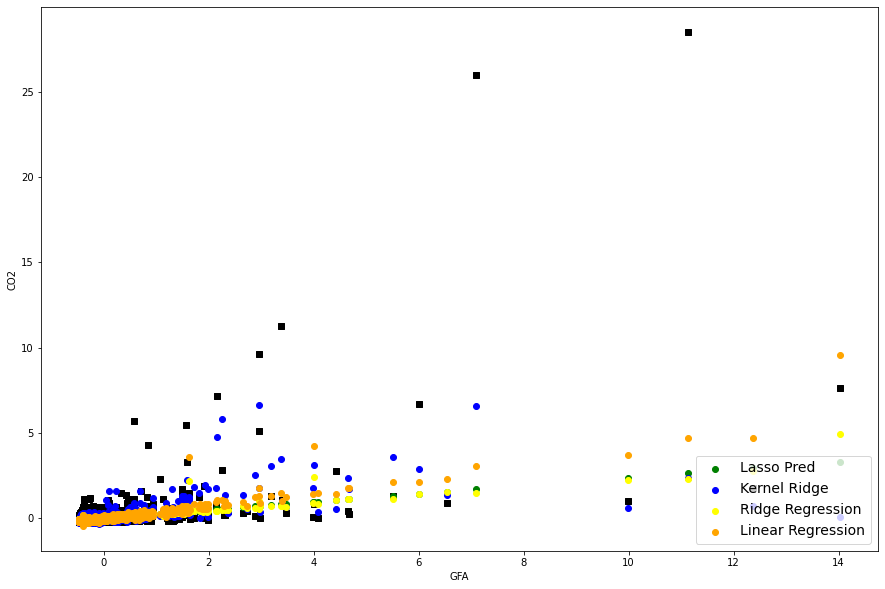

In [769]:
#A ajouter H2O pour aller à l'essentiel
#print(X_test[:, 1])
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_test[:, 1], y_test, color="black", marker='s')
plt.scatter(X_test[:, 1], Y_pred_lasso, color="green", marker='o', label="Lasso Pred")
plt.scatter(X_test[:, 1], Y_pred_kernel_ridge, color="blue", marker='o', label="Kernel Ridge")
plt.scatter(X_test[:, 1], Y_pred_reg_ridge, color="yellow", marker='o', label="Ridge Regression")
plt.scatter(X_test[:, 1], Y_pred_svm, color="lightgreen", marker='o', label="SVM")
plt.scatter(X_test[:, 1], Y_pred, color="orange", marker='o', label="Linear Regression")
plt.legend(loc="lower right", fontsize=14)
#plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
#plt.plot(fpr_cv, tpr_cv, '-', lw=2, label='gamma=%.1e, AUC=%.2f' % \
#         (gridSearch.best_params_['gamma'], auc_cv))
#Ajout de la diagonale de 0.0 à 1.1
#plt.plot([0,1], [0, 1])
plt.xlabel("GFA")
plt.ylabel("CO2")

# Graph Errors

ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

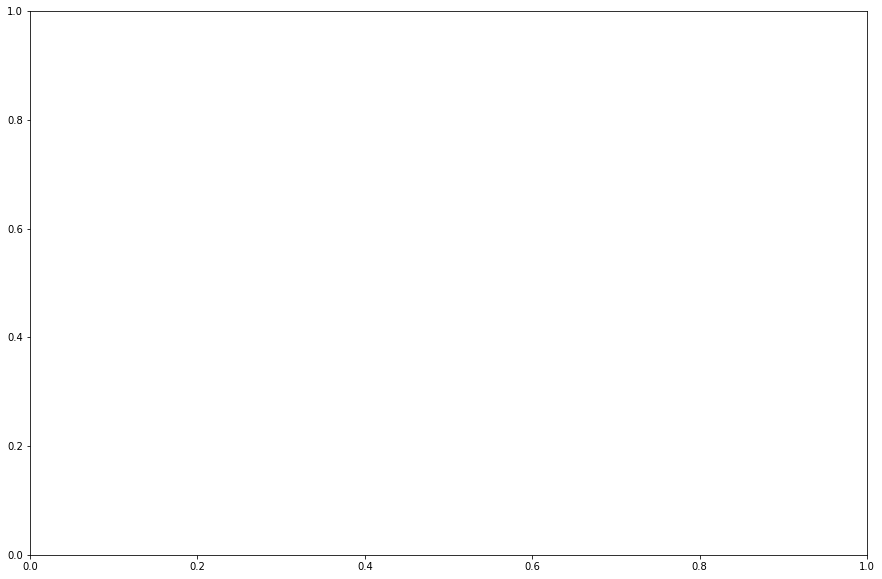

In [787]:
fig = plt.figure(figsize=(15, 10))
plt.plot(rmseLinearSVR, np.logspace(-5, 5, 10), color="black", marker='s')